<a href="https://colab.research.google.com/github/Hasitha-surapareddy/AIML-25/blob/main/lab%20exam(SET_13).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df1=pd.read_csv('/content/day.csv')
df2=pd.read_csv('/content/hour.csv')
df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df2.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# top 5 days when rentals are most
daily_rentals = df1.groupby('dteday')['cnt'].sum().reset_index()
daily_rentals.rename(columns={'cnt': 'total_rentals'}, inplace=True)

In [ ]:
daily_rentals = daily_rentals.sort_values(by=['total_rentals'], ascending=False)

In [ ]:
top_5_days = daily_rentals.head(5)
print(top_5_days)

         dteday  total_rentals
623  2012-09-15           8714
637  2012-09-29           8555
630  2012-09-22           8395
447  2012-03-23           8362
504  2012-05-19           8294


In [13]:
#predict the holidays when bike sharing is the most
holidays = df1[df1['holiday'] == 1]

In [14]:
holiday_rentals = holidays.groupby('dteday')['cnt'].sum().reset_index()
holiday_rentals.rename(columns={'cnt': 'total_rentals'}, inplace=True)

In [15]:
holiday_rentals = holiday_rentals.sort_values(by=['total_rentals'], ascending=False)

In [29]:
top_holidays = holiday_rentals.head()
print(top_holidays)

        dteday  total_rentals
15  2012-07-04           7403
13  2012-04-16           6370
18  2012-11-12           6269
4   2011-07-04           6043
14  2012-05-28           6043


**3.Top 5 reasons for bike sharing and rentals**=
convenience,cost-effectiveness,Health and fitness,Traffic reduction,Environment-friendly

In [22]:
#Name the weather conditions most suitable for bike rentals
weather_rentals = df1.groupby('weathersit')['cnt'].sum().reset_index()
weather_rentals.rename(columns={'cnt': 'total_rentals'}, inplace=True)

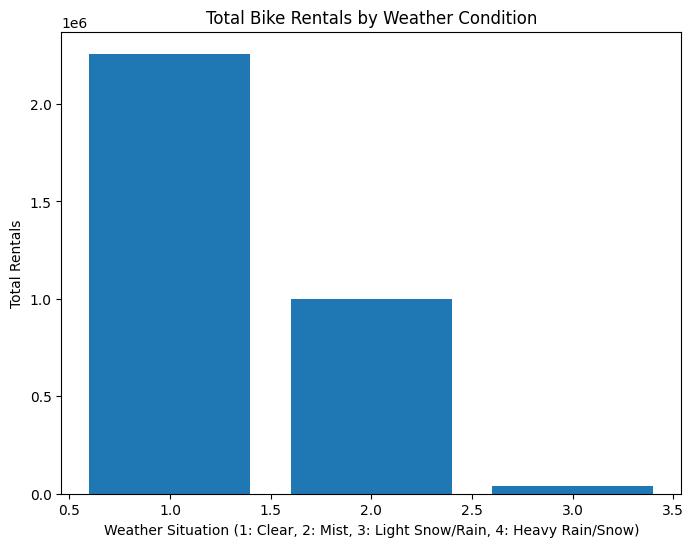

In [23]:
plt.figure(figsize=(8, 6))
plt.bar(weather_rentals['weathersit'], weather_rentals['total_rentals'])
plt.title('Total Bike Rentals by Weather Condition')
plt.xlabel('Weather Situation (1: Clear, 2: Mist, 3: Light Snow/Rain, 4: Heavy Rain/Snow)')
plt.ylabel('Total Rentals')
plt.show()

In [26]:
#hourly utilization of bike rentals
hourly_rentals = df2.groupby('hr')['cnt'].sum().reset_index()
hourly_rentals.rename(columns={'cnt': 'total_rentals'}, inplace=True)

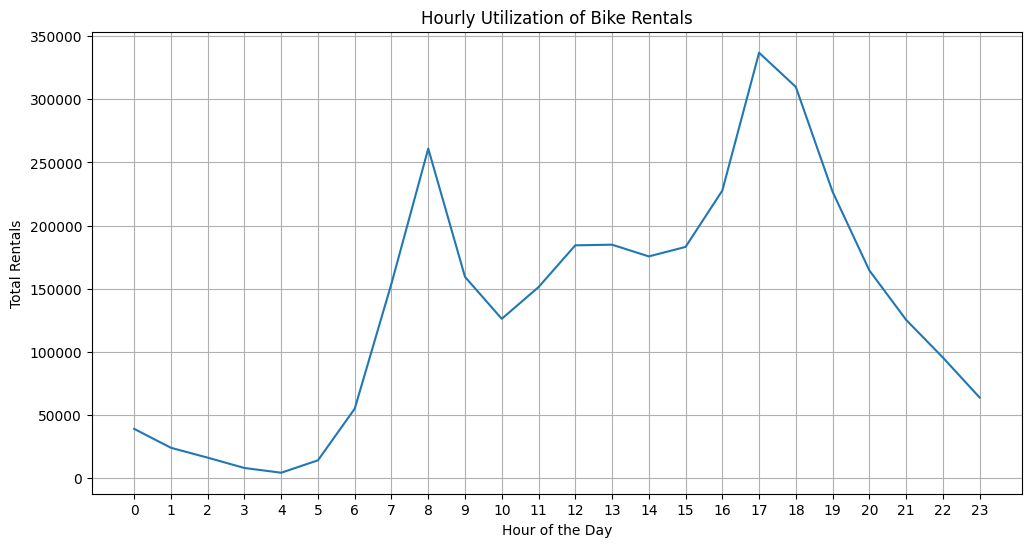

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(hourly_rentals['hr'], hourly_rentals['total_rentals'])
plt.title('Hourly Utilization of Bike Rentals')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rentals')
plt.xticks(range(24))  # Set x-axis ticks to represent each hour
plt.grid(True)
plt.show()